<IPython.core.display.Javascript object>


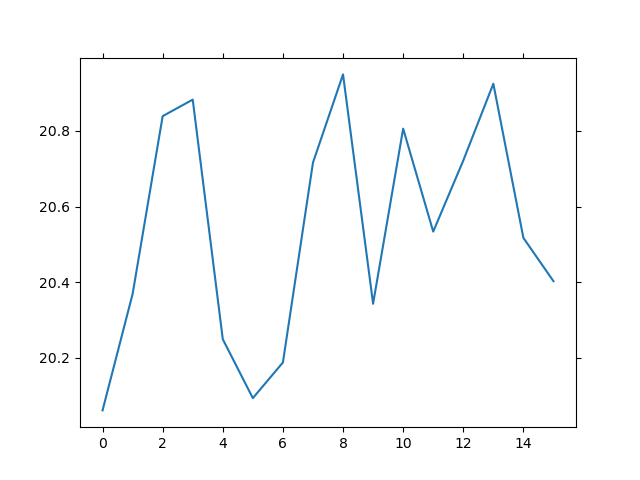

Connected with result code 0
(0, 1)
Message received-> temperature/test b'20.061528983604592'
Message received-> temperature/test b'20.369217691960735'
Message received-> temperature/test b'20.839081339564512'
Message received-> temperature/test b'20.882712495329603'
Message received-> temperature/test b'20.249610653680563'
Message received-> temperature/test b'20.093937680085812'
Message received-> temperature/test b'20.188183987098018'
Message received-> temperature/test b'20.71617455323319'
Message received-> temperature/test b'20.949368534719387'
Message received-> temperature/test b'20.34337910107819'
Message received-> temperature/test b'20.805944864582457'
Message received-> temperature/test b'20.534013276010807'
Message received-> temperature/test b'20.721736044741135'
Message received-> temperature/test b'20.924689291277744'
Message received-> temperature/test b'20.517379765004605'
Message received-> temperature/test b'20.40297057320068'


KeyboardInterrupt: 

In [11]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import paho.mqtt.client as mqtt
from datetime import datetime


x = []
y = []

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

x = []
y = []

def on_connect(client, userdata, flags, rc):  # The callback for when the client connects to the broker
    print("Connected with result code {0}".format(str(rc)))  # Print result of connection attempt
    test = client.subscribe("temperature/test")  # Subscribe to the topic “digitest/test1”, receive any messages published on it
    print(test)


def on_message(client, userdata, msg):  # The callback for when a PUBLISH message is received from the server.
    print("Message received-> " + msg.topic + " " + str(msg.payload))  # Print a received msg
    ax.clear()
    y.append(float(msg.payload.decode()))
    ax.plot(y)
    fig.canvas.draw()


client = mqtt.Client("digi_mqtt_test")  # Create instance of client with client ID “digi_mqtt_test”
client.on_connect = on_connect  # Define callback function for successful connection
client.on_message = on_message  # Define callback function for receipt of a message
# client.connect("m2m.eclipse.org", 1883, 60)  # Connect to (broker, port, keepalive-time)
client.connect('localhost', 1883)
# x and y given as array_like objects
import time

client.loop_forever()  # Start networking daemon